# Hands-on Activity 9.2 Customized Visualizations using Seaborn
##Instructions:

* Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

##Resources:

* Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv

##Procedures:

* 9.4 Introduction to Seaborn
* 9.5 Formatting Plots
* 9.6 Customizing Visualizations

##Data Analysis:

Each plotting methods have their own configuring principles because of their difference in usage. The procedure provided careful and comprehensive instructions which could be tinkered with for further understanding. This module helps us visualize further our datasets in different methods.

##Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

## Setup

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date',parse_dates=True)
earthquakes = pd.read_csv('earthquakes.csv')

In [7]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


In [8]:
earthquakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


Text(0.5, 0.98, "Correlation between earthquake magnitude and Tsunamis with 'mb' magType")

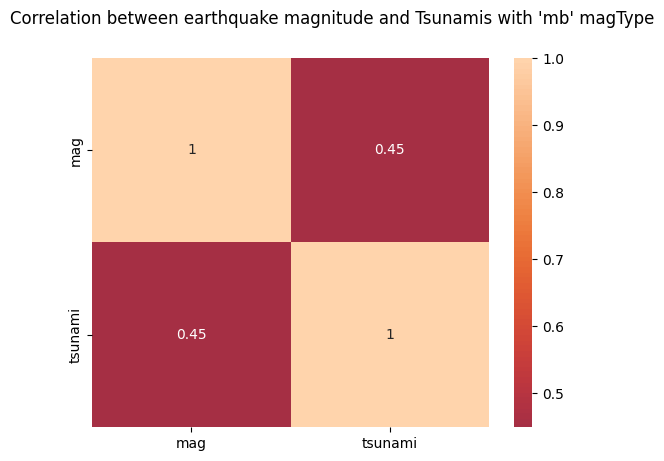

In [12]:
sns.heatmap(
   earthquakes.query('magType == "mb"')[['mag','tsunami',]].corr(), # correlation between earthquake magnitude
   annot = True, center = 0
)
plt.suptitle('Correlation between earthquake magnitude and Tsunamis with \'mb\' magType')

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

Text(0.5, 1.05, 'Facebook volume traded and closing price with bounds of a Tukey Fence')

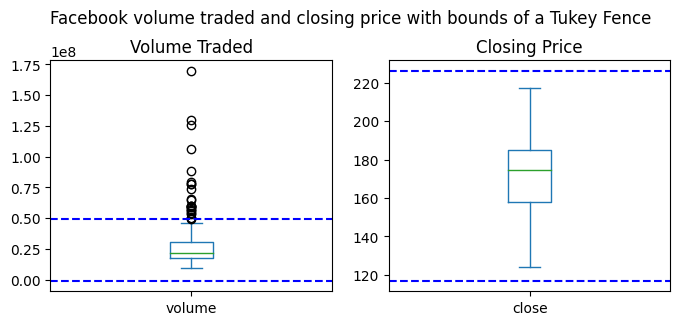

In [23]:
column = ['volume', 'close']  # initialize columns for subplotting
subset = fb[column]  # assign to
quantiles = subset.quantile([0.25, 0.75]) # 0.25 lower quantile / 0.75 upper quantile
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:] # subtract lower from upper
axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price']) # set subplots

for ax, col in zip(axes, column): # for loop
   stats = quantiles[col]
   lower = stats.loc[0.25] - 1.5 * stats['iqr'] # use the quantiles for getting lower
   upper = stats.loc[0.75] + 1.5 * stats['iqr'] # use the quantiles for getting upper
   for bound, name in zip([lower, upper], ['lower', 'upper']):
       ax.axhline( # for the lines
           bound,
           color='blue',
           linestyle='dashed',
       )
plt.suptitle('Facebook volume traded and closing price with bounds of a Tukey Fence', y = 1.05)

3. Fill in the area between the bounds in the plot from exercise #2.

Text(0.5, 1.05, 'Facebook volume traded and closing price with bounds of a Tukey Fence')

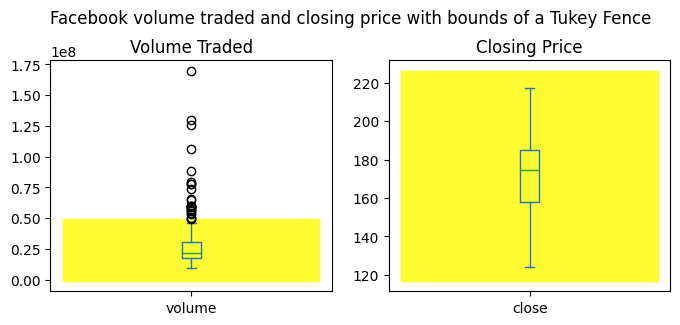

In [28]:
column = ['volume', 'close']  # initialize columns for subplotting
subset = fb[column]  # assign to
quantiles = subset.quantile([0.25, 0.75]) # 0.25 lower quantile / 0.75 upper quantile
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:] # subtract lower from upper
axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price']) # set subplots

for ax, col in zip(axes, column): # for loop
   stats = quantiles[col]
   lower = stats.loc[0.25] - 1.5 * stats['iqr'] # use the quantiles for getting lower
   upper = stats.loc[0.75] + 1.5 * stats['iqr'] # use the quantiles for getting upper
   for bound, name in zip([lower, upper], ['lower', 'upper']):
       ax.fill_between( # filling in the area
           [0,2], # the figure considered two as the whole size so we use from 0 to two to fill in left to right
           lower,
           upper,
           color='#fffc33'
       )
plt.suptitle('Facebook volume traded and closing price with bounds of a Tukey Fence', y = 1.05)

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

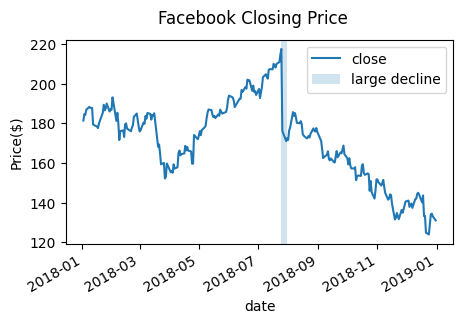

In [30]:
fb.close.plot(kind='line', figsize=(5, 3))
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.2, label='large decline') # in 2018, july 25 - july 31 was the large decline in facebook price
plt.ylabel('Price($)')
plt.suptitle('Facebook Closing Price')
plt.legend() # legend is important in this case

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
* Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Price')

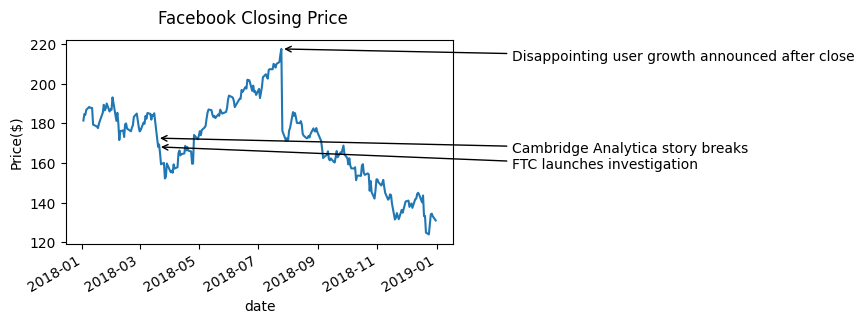

In [44]:
fb.close.plot(kind='line', figsize=(5, 3))
notes = [
   ('Disappointing user growth announced after close', '2018-07-25'), # align text with designated timeframes
   ('Cambridge Analytica story breaks', '2018-03-19'),
   ('FTC launches investigation', '2018-03-20')
]
for text, date in notes:
   y_value = fb.close[date]
   jitter = np.random.uniform(-20, -5, 1)
   plt.annotate(
       text,
       xy=(date, y_value),
       xytext=('2019-03-20', y_value + jitter), # adjusts the text
       arrowprops=dict(arrowstyle='->') # arrow property
   )
plt.ylabel('Price($)')
plt.suptitle('Facebook Closing Price')

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [61]:
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
def reg_resid_plots(data):
   """
   Using seaborn, plot the regression and residuals
   plots side-by-side for every permutation of 2 columns
   in the data.
   Parameters:
       - data: A pandas DataFrame
   Returns:
       A matplotlib Figure object.
   """
   num_cols = data.shape[1]
   permutation_count = num_cols * (num_cols - 1)
   fig, ax = plt.subplots(
       permutation_count,
       2,
       figsize=(15, 4 * permutation_count)
   )
   for (x, y), axes, color in zip(
       itertools.permutations(data.columns, 2),
       ax,
       [cm.Dark2(i) for i in range(len(ax))]
   ):
       for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
           func(
               x=x,
               y=y,
               data=data,
               ax=subplot,
               color='blue'
           )
   plt.close()
   return fig

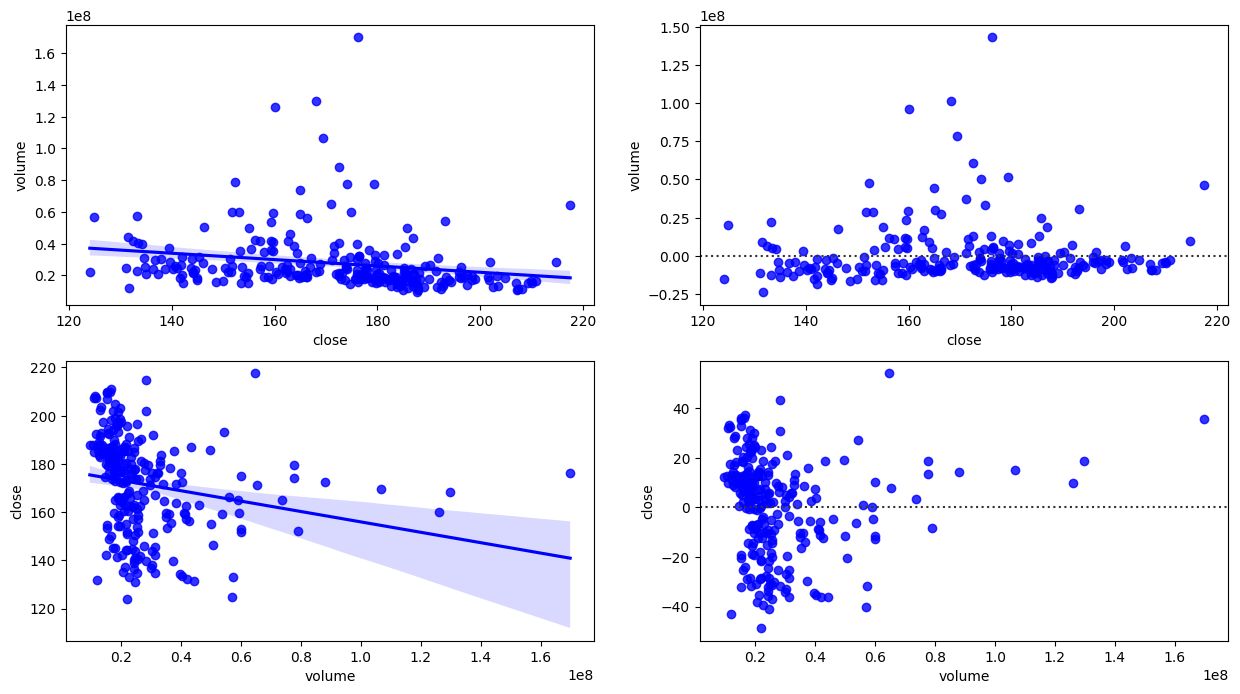

In [64]:
reg_resid_plots(fb[['open', 'volume']])

## Summary/Conclusion:
This section of the module also focused on visualizing data using but instead uses Seaborn. There are several plotting methods to choose from and each of them have their own forte in visualizing. A These methods have their own role in showcasing data. Fortunately, we can utilize these methods convenientlyusing the combination of Pandas and Seaborn.

